In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
print(os.getcwd())

/content


This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\

**Store** - the store number

**Date** - the week of sales

**Weekly_Sales** - sales for the given store

**Holiday_** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature** - Temperature on the day of sale

**Fuel_Price** - Cost of fuel in the region

**CPI** – Prevailing consumer price index

**Unemployment** - Prevailing unemployment rate

**Holiday Events\

**Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\

 **Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\

**Thanksgiving**: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\


**Christmas:** 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [4]:
# Mount Google Drive to Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import the Path class from the pathlib module
from pathlib import Path
# Define the path to the file
db = Path("/content/drive/MyDrive/Personal projects/walmart-sales-cleaned (2).csv")

In [6]:
# Load the dataset
df = pd.read_csv(db)

# Display the first few rows
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  total_store_sales  
0  211.096358         8.106       2.224028e+08  
1  211.242170         8.106       2.224028e+08  
2  211.289143         8.106       2.224028e+08  
3  211.319643         8.106       2.224028e+08  
4  211.350143         8.106       2.224028e+08  


Top-performing weeks (Overall):
   Week_Number  Weekly_Sales
46    2010-W51   80931415.60
98    2011-W51   76998241.31
94    2011-W47   66593605.26
42    2010-W47   65821003.24
45    2010-W50   61820799.85

Top-performing week per store:
      Store Week_Number  Weekly_Sales
46        1    2010-W51    2387950.20
189       2    2010-W51    3436007.68
332       3    2010-W51     605990.41
527       4    2011-W51    3676388.98
666       5    2011-W47     507900.07
761       6    2010-W51    2727575.18
956       7    2011-W51    1059715.27
1047      8    2010-W51    1511641.09
1242      9    2011-W51     905324.68
1333     10    2010-W51    3749057.69
1476     11    2010-W51    2306265.36
1619     12    2010-W51    1768249.89
1762     13    2010-W51    3595903.20
1905     14    2010-W51    3818686.45
2048     15    2010-W51    1368318.17
2191     16    2010-W51    1004730.69
2334     17    2010-W51    1309226.79
2477     18    2010-W51    2027507.15
2620     19    2010-W51    2678206.42
27

<ipython-input-7-1e5f00c0a9c0>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_weeks, x='Week_Number', y='Weekly_Sales', palette="Blues_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


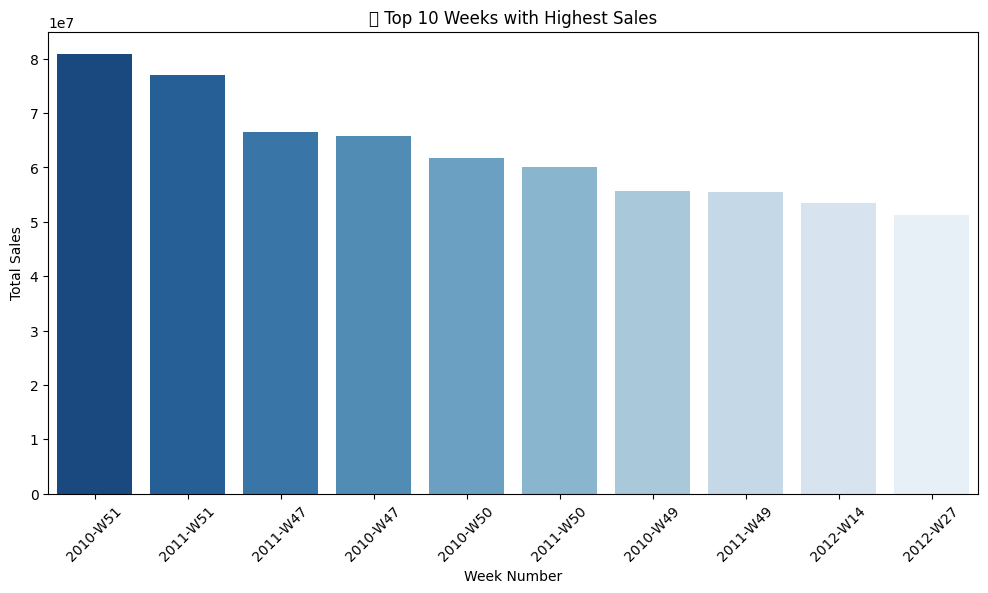

In [7]:


# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Create a new column for 'Week_Number' in YYYY-WW format
df['Week_Number'] = df['Date'].dt.strftime('%Y-W%U')

# Find the total weekly sales
weekly_sales = df.groupby('Week_Number')['Weekly_Sales'].sum().reset_index()

# Find the top 5 highest sales weeks
top_weeks = weekly_sales.sort_values(by="Weekly_Sales", ascending=False).head(5)

print("Top-performing weeks (Overall):")
print(top_weeks)

# Find the best-performing week for each store
top_week_per_store = df.groupby(['Store', 'Week_Number'])['Weekly_Sales'].sum().reset_index()
top_week_per_store = top_week_per_store.loc[top_week_per_store.groupby('Store')['Weekly_Sales'].idxmax()]

print("\nTop-performing week per store:")
print(top_week_per_store)

# --- 📊 Visualization ---
# 2️⃣ Bar Plot: Top 10 Weeks by Sales
plt.figure(figsize=(12, 6))
top_10_weeks = weekly_sales.sort_values(by="Weekly_Sales", ascending=False).head(10)
sns.barplot(data=top_10_weeks, x='Week_Number', y='Weekly_Sales', palette="Blues_r")
plt.xlabel("Week Number")
plt.ylabel("Total Sales")
plt.title("🏆 Top 10 Weeks with Highest Sales")
plt.xticks(rotation=45)
plt.show()



In [8]:
import pandas as pd
from IPython.display import display

top_week_per_store_sorted = top_week_per_store.sort_values(by="Weekly_Sales", ascending=False)
styled_table = top_week_per_store_sorted.style.background_gradient(cmap="Blues").set_properties(**{'text-align': 'center'})
display(styled_table)




,Store,Week_Number,Weekly_Sales
1905,14,2010-W51,3818686.450000
2763,20,2010-W51,3766687.430000
1333,10,2010-W51,3749057.690000
527,4,2011-W51,3676388.980000
1762,13,2010-W51,3595903.200000
189,2,2010-W51,3436007.680000
3764,27,2010-W51,3078162.080000
3192,23,2010-W51,2734277.100000
761,6,2010-W51,2727575.180000
2620,19,2010-W51,2678206.420000


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort data by Store and Date (good practice for time series)
df.sort_values(['Store', 'Date'], inplace=True)

# Filter only Store 1
df_store = df[df['Store'] == 1].copy()


In [10]:
# Lag features
df_store['Lag_1'] = df_store['Weekly_Sales'].shift(1)
df_store['Lag_2'] = df_store['Weekly_Sales'].shift(2)
df_store['Lag_3'] = df_store['Weekly_Sales'].shift(3)
df_store['Lag_52'] = df_store['Weekly_Sales'].shift(52)  # Sales same week last year

# Drop missing values from lag
df_store.dropna(inplace=True)


Feature importance defined by corelation matrix

In [11]:
# Select relevant columns including Holiday_Flag
corr_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']

# Compute correlation matrix
correlation_matrix = df[corr_features].corr()

# Display the matrix
print(correlation_matrix)


              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176   
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158   
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684   
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020   
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000   
Holiday_Flag      0.036891    -0.155091   -0.078347 -0.002162      0.010960   

              Holiday_Flag  
Weekly_Sales      0.036891  
Temperature      -0.155091  
Fuel_Price       -0.078347  
CPI              -0.002162  
Unemployment      0.010960  
Holiday_Flag      1.000000  


In [12]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,total_store_sales,Week_Number
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2.224028e+08,2010-W05
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2.224028e+08,2010-W06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2.224028e+08,2010-W07
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2.224028e+08,2010-W08
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2.224028e+08,2010-W09


In [13]:
print(df.columns.tolist())


['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'total_store_sales', 'Week_Number']


In [14]:
top_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()
print("Top Store:", top_store)


Top Store: 20


Performing a linear regression model on the store with most  sales , here Store: 20

In [15]:
store_df = df[df['Store'] == top_store].copy()


Feature Engineering

In [16]:
store_df['Date'] = pd.to_datetime(store_df['Date'])
store_df = store_df.sort_values('Date')


In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create lag features
store_df['Lag_1'] = store_df['Weekly_Sales'].shift(1)
store_df['Rolling_Mean_3'] = store_df['Weekly_Sales'].rolling(window=3).mean()
store_df['Month'] = store_df['Date'].dt.month
store_df['Year'] = store_df['Date'].dt.year

# Drop initial NaNs caused by lag
store_df.dropna(inplace=True)


Defining features nd Training the model

In [18]:
features = ['Lag_1', 'Rolling_Mean_3', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']
X = store_df[features]
y = store_df['Weekly_Sales']


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Baseline Model MSE: {mse:.2f}")


Baseline Model MSE: 15604278121.14


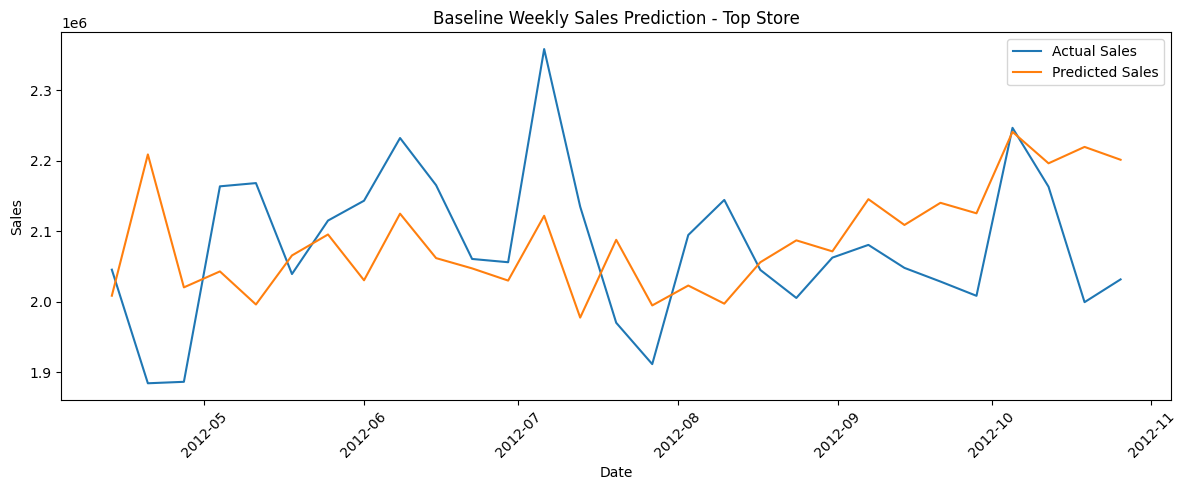

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(store_df['Date'].iloc[-len(y_test):], y_test.values, label='Actual Sales')
plt.plot(store_df['Date'].iloc[-len(y_test):], y_pred, label='Predicted Sales')
plt.legend()
plt.title("Baseline Weekly Sales Prediction - Top Store")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


K-Mean regression


In [23]:
# Step 1: Create store-level aggregates for clustering
store_agg = df.groupby('Store').agg({
    'Weekly_Sales': ['mean', 'std'],
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

store_agg.columns = ['Store', 'Avg_Sales', 'Sales_STD', 'Avg_Fuel', 'Avg_CPI', 'Avg_Unemp']

# Step 2: K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
store_agg['Store_Cluster'] = kmeans.fit_predict(store_agg.drop('Store', axis=1))

# Step 3: Merge cluster back to main data
df = df.merge(store_agg[['Store', 'Store_Cluster']], on='Store', how='left')


In [24]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,total_store_sales,Week_Number,Store_Cluster
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2.224028e+08,2010-W05,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2.224028e+08,2010-W06,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2.224028e+08,2010-W07,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2.224028e+08,2010-W08,1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2.224028e+08,2010-W09,1


In [25]:
# Sort by date to ensure proper lagging
df = df.sort_values(by=['Store', 'Date'])  # Include 'Store' to avoid data leakage across stores

# Create lag feature
df['Lag_1'] = df.groupby('Store')['Weekly_Sales'].shift(1)

# Drop rows with NaNs (from lag)
df = df.dropna()


Feature Engineering → Model → Prediction → Staffing

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 🗓️ Create Week Number Feature
df['Week'] = df['Date'].dt.isocalendar().week

# ✅ Final Features for Modeling
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Lag_1', 'Week', 'Store_Cluster']
target = 'Weekly_Sales'

# 🎯 Split Data into X and y
X = df[features]
y = df[target]

# ✂️ Train-Test Split (No Shuffling due to time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🌲 Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 Predict and Evaluate
y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Model MSE (with Store_Cluster): {rf_mse:.2f}")

# 🧮 Predict All + Estimate Employees
df['Predicted_Sales'] = rf_model.predict(X)
avg_sales_per_employee = 5000  # Change if needed
df['Employees_Needed'] = (df['Predicted_Sales'] / avg_sales_per_employee).round()


<ipython-input-26-92ef4a21df4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week'] = df['Date'].dt.isocalendar().week


Random Forest Model MSE (with Store_Cluster): 6888360059.38


Random Forest VS Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# 🎯 Use same features and target
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Lag_1', 'Week', 'Store_Cluster']
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# ✂️ Same Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🌲 Random Forest Model (Already trained)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = sqrt(rf_mse)

# ➕ Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = sqrt(lr_mse)

# 📊 Compare Results
print(f"🔍 Random Forest MSE: {rf_mse:,.2f} | RMSE: ${rf_rmse:,.2f}")
print(f"🧮 Linear Regression MSE: {lr_mse:,.2f} | RMSE: ${lr_rmse:,.2f}")


🔍 Random Forest MSE: 6,888,360,059.38 | RMSE: $82,996.14
🧮 Linear Regression MSE: 15,406,768,977.92 | RMSE: $124,124.01


In [28]:
# Save the DataFrame to a CSV file
df.to_csv("walmart_sales_model_ready.csv", index=False)

#from google.colab import files
#files.download("walmart_sales_model_ready.csv")

Total predicted sales for 2013 (across all stores): $2,452,968,704.00


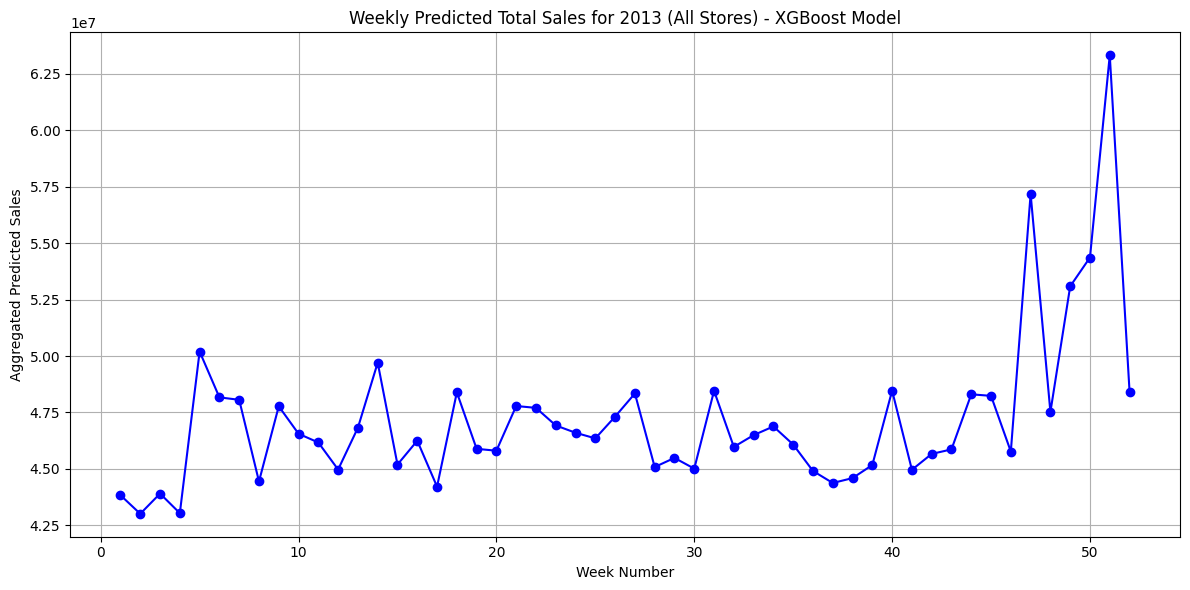

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# ====== Data Preprocessing ======
# Ensure the Date column is datetime and create the Year column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Features and target columns used for modeling
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Lag_1', 'Week', 'Store_Cluster']
target = 'Weekly_Sales'

# Extract X and y from the historical data (2010–2012)
X = df[features]
y = df[target]

# ====== Train a Better Model: XGBoost ======
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X, y)

# ====== Forecast for 2013 Across All Stores ======

# Get the unique store IDs
store_ids = df['Store'].unique()

# List to store the forecast DataFrame for each store
forecast_list = []

# For each store, create a 2013 forecast using its most recent available data
for store in store_ids:
    store_data = df[df['Store'] == store]
    # Get the latest available row for that store (assumed to be from 2012)
    latest_row = store_data.iloc[-1]

    # Generate weekly dates for 2013
    future_dates = pd.date_range(start='2013-01-01', end='2013-12-31', freq='W')

    # Build a forecast DataFrame for the current store
    store_forecast = pd.DataFrame({
        'Date': future_dates,
        'Store': store,  # same store ID for all rows
        'Holiday_Flag': 0,  # assume no holidays (or use an average / forecasted value)
        'Temperature': latest_row['Temperature'],
        'Fuel_Price': latest_row['Fuel_Price'],
        'CPI': latest_row['CPI'],
        'Unemployment': latest_row['Unemployment'],
        'Lag_1': latest_row['Weekly_Sales'],  # using the last known weekly sales as a placeholder
        'Week': future_dates.isocalendar().week,  # week numbers for each date
        'Store_Cluster': latest_row['Store_Cluster']
    })
    store_forecast['Year'] = 2013  # Set the year to 2013
    forecast_list.append(store_forecast)

# Combine forecasts for all stores into one DataFrame for 2013
forecast_2013 = pd.concat(forecast_list, ignore_index=True)

# ====== Predict Sales for 2013 ======
# Use the trained XGBoost model to predict weekly sales for each store in 2013
forecast_2013['Predicted_Sales'] = xgb_model.predict(forecast_2013[features])

# ====== Aggregation and Visualization ======

# Aggregate the predicted sales by week across all stores (company-wide)
weekly_forecast = forecast_2013.groupby('Week').agg({
    'Predicted_Sales': 'sum'
}).reset_index()

# Also, calculate the overall total predicted sales for 2013
total_predicted_sales_2013 = forecast_2013['Predicted_Sales'].sum()
print("Total predicted sales for 2013 (across all stores): ${:,.2f}".format(total_predicted_sales_2013))

# Plot a line chart of the weekly aggregated predictions
plt.figure(figsize=(12, 6))
plt.plot(weekly_forecast['Week'], weekly_forecast['Predicted_Sales'], marker='o', color='blue')
plt.title('Weekly Predicted Total Sales for 2013 (All Stores) - XGBoost Model')
plt.xlabel('Week Number')
plt.ylabel('Aggregated Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


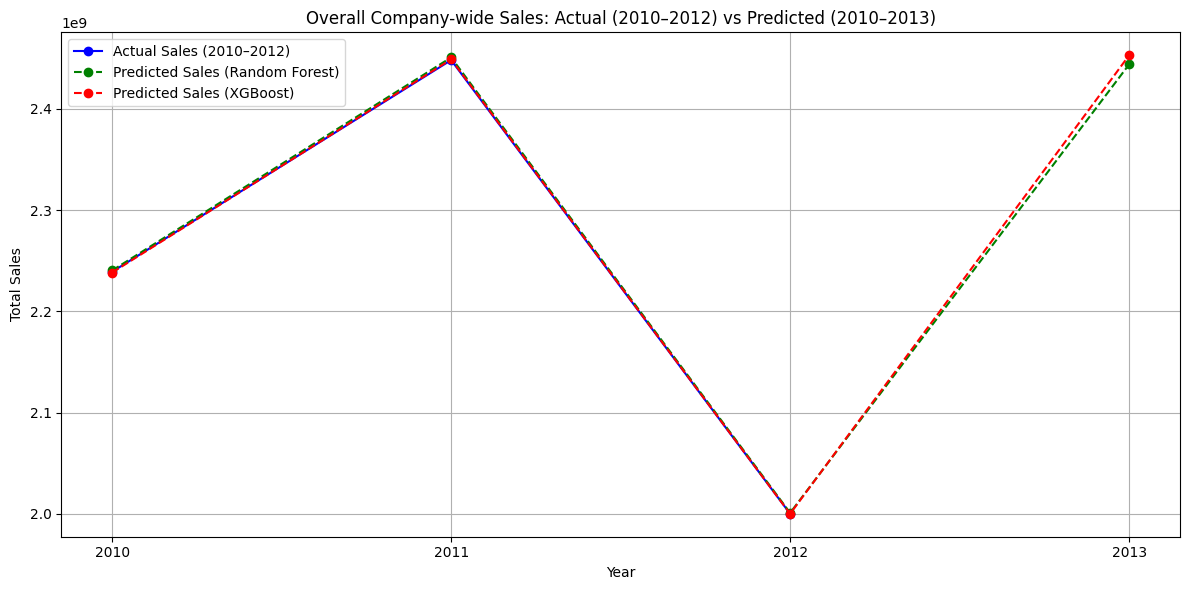

Overall predicted sales for 2013 (Random Forest): $2,443,966,116.60
Overall predicted sales for 2013 (XGBoost): $2,452,968,704.00


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ========================
# 1. Load and Preprocess Data
# ========================
df = pd.read_csv("walmart_sales_model_ready.csv")

# Ensure Date is parsed and create 'Year' if not already present
df['Date'] = pd.to_datetime(df['Date'])
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year

# ========================
# 2. Define Features & Target
# ========================
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Lag_1', 'Week', 'Store_Cluster']
target = 'Weekly_Sales'

# Use historical data only (2010–2012) for training
historical = df[df['Year'] <= 2012].copy()

X_hist = historical[features]
y_hist = historical[target]

# ========================
# 3. Train Two Models on Historical Data
# ========================

# a) Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_hist, y_hist)
historical['Pred_RF'] = rf_model.predict(X_hist)

# b) XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_hist, y_hist)
historical['Pred_XGB'] = xgb_model.predict(X_hist)

# ========================
# 4. Aggregate Historical Data (2010–2012)
# ========================
# Aggregate company-wide sales (summing over all stores) for actual and predicted values
hist_agg = historical.groupby('Year').agg({
    'Weekly_Sales': 'sum',     # Actual
    'Pred_RF': 'sum',          # RF predictions on historical data
    'Pred_XGB': 'sum'          # XGBoost predictions on historical data
}).reset_index()

# ========================
# 5. Forecast 2013 for All Stores Using Both Models
# ========================
store_ids = df['Store'].unique()
forecast_list_rf = []  # will store Random Forest forecasts
forecast_list_xgb = []  # will store XGBoost forecasts

for store in store_ids:
    store_data = historical[historical['Store'] == store]
    # Use the latest record (assumed to be from 2012) for each store as a base
    latest_row = store_data.iloc[-1]

    # Generate weekly dates for 2013
    future_dates = pd.date_range(start='2013-01-01', end='2013-12-31', freq='W')
    n_weeks = len(future_dates)

    # Build a forecast DataFrame for this store
    store_forecast = pd.DataFrame({
        'Date': future_dates,
        'Store': store,
        'Holiday_Flag': 0,  # assumption; you might adjust if needed
        'Temperature': latest_row['Temperature'],
        'Fuel_Price': latest_row['Fuel_Price'],
        'CPI': latest_row['CPI'],
        'Unemployment': latest_row['Unemployment'],
        'Lag_1': latest_row['Weekly_Sales'],  # using latest known sales as placeholder
        'Week': future_dates.isocalendar().week,
        'Store_Cluster': latest_row['Store_Cluster']
    })
    store_forecast['Year'] = 2013  # Forecast year

    # Predict for this store with both models
    X_future = store_forecast[features]
    store_forecast['Pred_RF'] = rf_model.predict(X_future)
    store_forecast['Pred_XGB'] = xgb_model.predict(X_future)

    # Append predictions to lists
    forecast_list_rf.append(store_forecast[['Date', 'Year', 'Pred_RF']])
    forecast_list_xgb.append(store_forecast[['Date', 'Year', 'Pred_XGB']])

# Combine the forecasts from all stores for 2013
forecast_rf = pd.concat(forecast_list_rf, ignore_index=True)
forecast_xgb = pd.concat(forecast_list_xgb, ignore_index=True)

# Aggregate the weekly predictions to get overall company-wide forecast for 2013
forecast_rf_agg = forecast_rf.groupby('Year').agg({'Pred_RF': 'sum'}).reset_index()
forecast_xgb_agg = forecast_xgb.groupby('Year').agg({'Pred_XGB': 'sum'}).reset_index()

# ========================
# 6. Combine Historical and Forecasted Data
# ========================
# Build a combined DataFrame for Actual sales:
#   - For 2010–2012, take actual totals from hist_agg.
#   - For 2013, leave actual as NaN (or zero) since actual data is not available.
combined_actual = pd.concat([
    hist_agg[['Year', 'Weekly_Sales']],
    pd.DataFrame({'Year': [2013], 'Weekly_Sales': [np.nan]})
], ignore_index=True).sort_values('Year')

# Build a combined DataFrame for RF predictions:
combined_rf = pd.concat([
    hist_agg[['Year', 'Pred_RF']],
    forecast_rf_agg
], ignore_index=True).sort_values('Year')

# Build a combined DataFrame for XGB predictions:
combined_xgb = pd.concat([
    hist_agg[['Year', 'Pred_XGB']],
    forecast_xgb_agg
], ignore_index=True).sort_values('Year')

# ========================
# 7. Visualization: Two-Line Chart
# ========================
plt.figure(figsize=(12, 6))
# Plot actual historical (2010–2012)
plt.plot(combined_actual['Year'], combined_actual['Weekly_Sales'], marker='o', label='Actual Sales (2010–2012)', color='blue')
# Plot RF predictions for 2010–2013
plt.plot(combined_rf['Year'], combined_rf['Pred_RF'], marker='o', linestyle='--', label='Predicted Sales (Random Forest)', color='green')
# Plot XGB predictions for 2010–2013
plt.plot(combined_xgb['Year'], combined_xgb['Pred_XGB'], marker='o', linestyle='--', label='Predicted Sales (XGBoost)', color='red')

plt.title('Overall Company-wide Sales: Actual (2010–2012) vs Predicted (2010–2013)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks([2010, 2011, 2012, 2013])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print overall 2013 forecast for reference
total_pred_rf_2013 = forecast_rf_agg.loc[forecast_rf_agg['Year'] == 2013, 'Pred_RF'].values[0]
total_pred_xgb_2013 = forecast_xgb_agg.loc[forecast_xgb_agg['Year'] == 2013, 'Pred_XGB'].values[0]

print("Overall predicted sales for 2013 (Random Forest): ${:,.2f}".format(total_pred_rf_2013))
print("Overall predicted sales for 2013 (XGBoost): ${:,.2f}".format(total_pred_xgb_2013))


Since the data was extremely large there were fluctuations in the data, features were not providing any drastic insights , we are switching too short term prediciton for upcoming week

**Summary**
**Objective for the Short-Term Forecasting Model:**

Predict next week’s sales for each store and aggregate these for overall company performance.

Enhance your feature set to capture short-term dynamics (multiple lags, rolling averages, recent trends).

Train and validate using a sequential/rolling approach.

Implement what-if simulations at the weekly level to analyze potential sales improvements.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from math import sqrt

# ---------------------------
# 1. Data Preparation & Feature Engineering
# ---------------------------
# Load your dataset (assuming "walmart_sales_model_ready.csv" contains historical weekly sales data)
df = pd.read_csv("walmart_sales_model_ready.csv")

# Ensure proper date format and sort data by Store and Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Store', 'Date'])

# Create a new target: Next_Week_Sales by shifting Weekly_Sales by -1 within each store
df['Next_Week_Sales'] = df.groupby('Store')['Weekly_Sales'].shift(-1)

# Optional: Create additional lag features for more short-term dynamics
df['Lag_2'] = df.groupby('Store')['Weekly_Sales'].shift(2)
df['Lag_3'] = df.groupby('Store')['Weekly_Sales'].shift(3)

# Drop rows with missing target or lag values (at the end of each store's series)
df_model = df.dropna(subset=['Next_Week_Sales', 'Lag_1', 'Lag_2', 'Lag_3']).copy()

# ---------------------------
# 2. Define Features & Target for Next-Week Forecasting
# ---------------------------
# Update features list to include additional lags
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Lag_1', 'Lag_2', 'Lag_3', 'Week', 'Store_Cluster']

# Our new target is "Next_Week_Sales"
target = 'Next_Week_Sales'

X = df_model[features]
y = df_model[target]

# (If needed, you can convert 'Store' and 'Store_Cluster' to categorical or keep as numeric identifiers)

# ---------------------------
# 3. Train-Test Split & Model Training
# ---------------------------
# Since this is time series, we won't shuffle the data.
# For illustration, we take the last 10% of the data as test; in practice, you may use rolling forecasts.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=False)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_rmse = sqrt(np.mean((y_test - y_pred_rf) ** 2))
print("Random Forest RMSE for next-week prediction: ${:,.2f}".format(rf_rmse))

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = sqrt(np.mean((y_test - y_pred_xgb) ** 2))
print("XGBoost RMSE for next-week prediction: ${:,.2f}".format(xgb_rmse))

# ---------------------------
# 4. Next-Week Forecast for All Stores (Company-Wide)
# ---------------------------
# For each store, use the most recent available record to predict next week's sales.
store_ids = df_model['Store'].unique()
forecast_list_rf = []
forecast_list_xgb = []

for store in store_ids:
    store_data = df_model[df_model['Store'] == store]
    # Get the latest available record for the store
    latest_record = store_data.iloc[-1].copy()
    # Optionally, update the "Date" to next week, and "Week" accordingly (here, we keep feature values as baseline)
    # Set prediction input for this store (as a DataFrame)
    input_df = pd.DataFrame([latest_record[features]])

    # Predict next week's sales using both models
    pred_rf = rf_model.predict(input_df)[0]
    pred_xgb = xgb_model.predict(input_df)[0]

    # Save predictions with store id
    forecast_list_rf.append({'Store': store, 'Next_Week_RF': pred_rf})
    forecast_list_xgb.append({'Store': store, 'Next_Week_XGB': pred_xgb})

# Create DataFrames for forecasts
forecast_rf_df = pd.DataFrame(forecast_list_rf)
forecast_xgb_df = pd.DataFrame(forecast_list_xgb)

# Merge the two model forecasts
forecast_next_week = pd.merge(forecast_rf_df, forecast_xgb_df, on='Store')

# Aggregate over all stores to get company-wide next-week sales forecast
total_rf_forecast = forecast_next_week['Next_Week_RF'].sum()
total_xgb_forecast = forecast_next_week['Next_Week_XGB'].sum()

print("Company-wide next-week sales forecast (Random Forest): ${:,.2f}".format(total_rf_forecast))
print("Company-wide next-week sales forecast (XGBoost): ${:,.2f}".format(total_xgb_forecast))

# ---------------------------
# 5. What-If Scenario Simulation: Adjust a Key Feature (e.g., Unemployment)
# ---------------------------
# Create a copy of the forecast input for all stores for simulation
scenario_list_rf = []
for store in store_ids:
    store_data = df_model[df_model['Store'] == store]
    latest_record = store_data.iloc[-1].copy()
    # Adjust the key feature: lower Unemployment by 1 percentage point (ensure it doesn't go negative)
    latest_record['Unemployment'] = max(latest_record['Unemployment'] - 1, 0)
    input_df = pd.DataFrame([latest_record[features]])
    pred_rf_scenario = rf_model.predict(input_df)[0]
    scenario_list_rf.append({'Store': store, 'Next_Week_RF_Scenario': pred_rf_scenario})

scenario_forecast_rf = pd.DataFrame(scenario_list_rf)
# Aggregate scenario predictions
total_rf_forecast_scenario = scenario_forecast_rf['Next_Week_RF_Scenario'].sum()

print("Company-wide next-week sales forecast with 1% lower Unemployment (RF): ${:,.2f}".format(total_rf_forecast_scenario))
print("Change due to 1% lower Unemployment (RF): ${:,.2f}".format(total_rf_forecast_scenario - total_rf_forecast))


Random Forest RMSE for next-week prediction: $64,611.13
XGBoost RMSE for next-week prediction: $66,310.41
Company-wide next-week sales forecast (Random Forest): $45,787,100.71
Company-wide next-week sales forecast (XGBoost): $45,661,196.00
Company-wide next-week sales forecast with 1% lower Unemployment (RF): $45,923,147.34
Change due to 1% lower Unemployment (RF): $136,046.63


Now we are comparing diffrent models ranging from time series to neural networks, we want to how does the prediciton varies based on each model and which one provides the most accurate one

In [32]:
# For ARIMA
from statsmodels.tsa.arima.model import ARIMA

# For Prophet (install with: pip install prophet)
from prophet import Prophet

# For KNN
from sklearn.neighbors import KNeighborsRegressor

# For RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [33]:
# 1. DATA PREPARATION: Aggregate Weekly Sales (Company-Wide)
# =============================================================================

# Load your historical dataset (assumes "walmart_sales_model_ready.csv" is preprocessed appropriately)
df = pd.read_csv("walmart_sales_model_ready.csv")

# Make sure the Date column is datetime and then aggregate weekly
df['Date'] = pd.to_datetime(df['Date'])
# Aggregate overall weekly sales across all stores
df_weekly = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_weekly = df_weekly.sort_values('Date')
df_weekly.set_index('Date', inplace=True)

In [34]:
# 2. Split Data into Training and Test Sets
# =============================================================================
# For this example, we will use all but the last 12 weeks for training.
train = df_weekly.iloc[:-12]
test = df_weekly.iloc[-12:]
print("Training data points:", len(train), "Test data points:", len(test))

Training data points: 130 Test data points: 12


Time series models: ARIMA, Prophet

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: $1,907,324.49


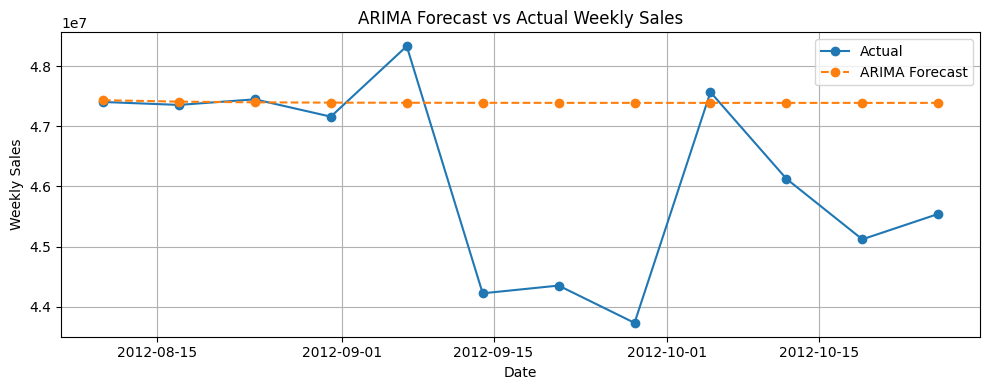

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5tolalb/x_1oxblb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj5tolalb/wr6xxy0t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24864', 'data', 'file=/tmp/tmpj5tolalb/x_1oxblb.json', 'init=/tmp/tmpj5tolalb/wr6xxy0t.json', 'output', 'file=/tmp/tmpj5tolalb/prophet_modelo77h__2h/prophet_model-20250422172943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:29:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:29:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: $1,200,617.02


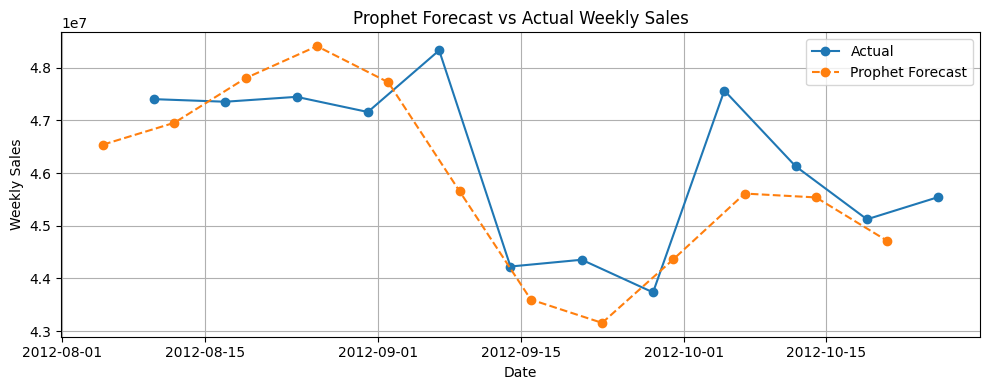

In [35]:
# 3. MODEL 1: ARIMA
# =============================================================================
# We'll choose an ARIMA order (this is an example; optimal orders may differ).
model_arima = ARIMA(train, order=(1,1,1))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=12)
rmse_arima = sqrt(np.mean((test['Weekly_Sales'].values - forecast_arima.values)**2))
print("ARIMA RMSE: ${:,.2f}".format(rmse_arima))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
# Plot actual weekly sales from the test set (assuming 'test' is a DataFrame with index as date)
plt.plot(test.index, test['Weekly_Sales'], label="Actual", marker='o')
# Plot ARIMA forecasted values
plt.plot(test.index, forecast_arima.values, label="ARIMA Forecast", marker='o', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("ARIMA Forecast vs Actual Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# =============================================================================
# 4. MODEL 2: Prophet
# =============================================================================
# Prophet requires a DataFrame with columns ds (date) and y (target)
df_prophet = df_weekly.reset_index().rename(columns={'Date':'ds', 'Weekly_Sales':'y'})
train_prophet = df_prophet.iloc[:-12]
test_prophet = df_prophet.iloc[-12:]
model_prophet = Prophet()
model_prophet.fit(train_prophet)
future = model_prophet.make_future_dataframe(periods=12, freq='W')
forecast_prophet = model_prophet.predict(future)
# Extract the forecast for the test period
forecast_prophet_test = forecast_prophet[['ds', 'yhat']].iloc[-12:]
rmse_prophet = sqrt(np.mean((test_prophet['y'].values - forecast_prophet_test['yhat'].values)**2))
print("Prophet RMSE: ${:,.2f}".format(rmse_prophet))

plt.figure(figsize=(10, 4))
# Plot actual weekly sales (using the Prophet-formatted DataFrame)
plt.plot(test_prophet['ds'], test_prophet['y'], label="Actual", marker='o')
# Plot Prophet forecasted values
plt.plot(forecast_prophet_test['ds'], forecast_prophet_test['yhat'], label="Prophet Forecast", marker='o', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Prophet Forecast vs Actual Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KNN regression

KNN RMSE: $2,096,030.01


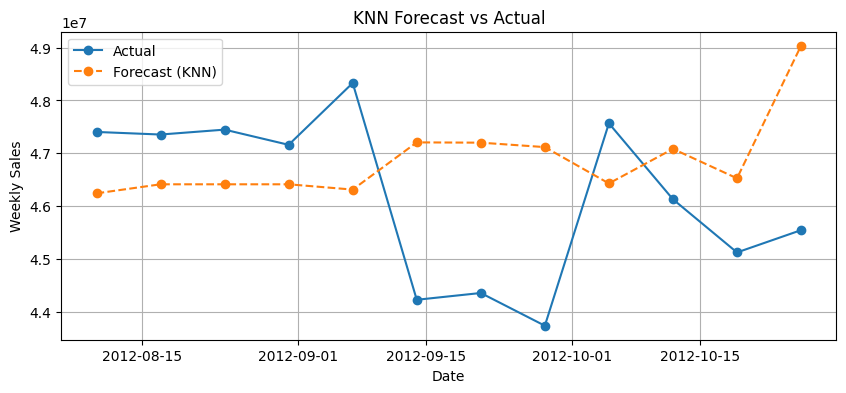

In [36]:
# =============================================================================
# Create lag features for the aggregated series.
df_knn = df_weekly.reset_index()
df_knn['Lag1'] = df_knn['Weekly_Sales'].shift(1)
# Drop missing values
df_knn = df_knn.dropna()
# Split into training and test based on the latest 12 points.
train_knn = df_knn.iloc[:-12]
test_knn = df_knn.iloc[-12:]
knn_model = KNeighborsRegressor(n_neighbors=5)
X_train_knn = train_knn[['Lag1']]
y_train_knn = train_knn['Weekly_Sales']
knn_model.fit(X_train_knn, y_train_knn)
X_test_knn = test_knn[['Lag1']]
forecast_knn = knn_model.predict(X_test_knn)
rmse_knn = sqrt(np.mean((test_knn['Weekly_Sales'].values - forecast_knn)**2))
print("KNN RMSE: ${:,.2f}".format(rmse_knn))

import matplotlib.pyplot as plt

# Example visualization code for one model:
# Replace these with your variables:
#   test_actual: the actual Weekly_Sales values for the test set
#   predictions_model: the forecasted/predicted Weekly_Sales from a given model

plt.figure(figsize=(10, 4))
#plot of the actual sales
plt.plot(test_knn['Date'], test_knn['Weekly_Sales'], label="Actual", marker='o')
#plot of KNN model
plt.plot(test_knn['Date'], forecast_knn, label="Forecast (KNN)",  marker='o',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("KNN Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()




In [37]:

print(df_knn['Date'].dtype)
print(df_knn['Date'].head())
print("Min date:", df_knn['Date'].min())
print("Max date:", df_knn['Date'].max())


datetime64[ns]
1   2010-02-19
2   2010-02-26
3   2010-03-05
4   2010-03-12
5   2010-03-19
Name: Date, dtype: datetime64[ns]
Min date: 2010-02-19 00:00:00
Max date: 2012-10-26 00:00:00


Neural Network (RNN(LSTM))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
RNN (LSTM) RMSE: $1,743,388.86


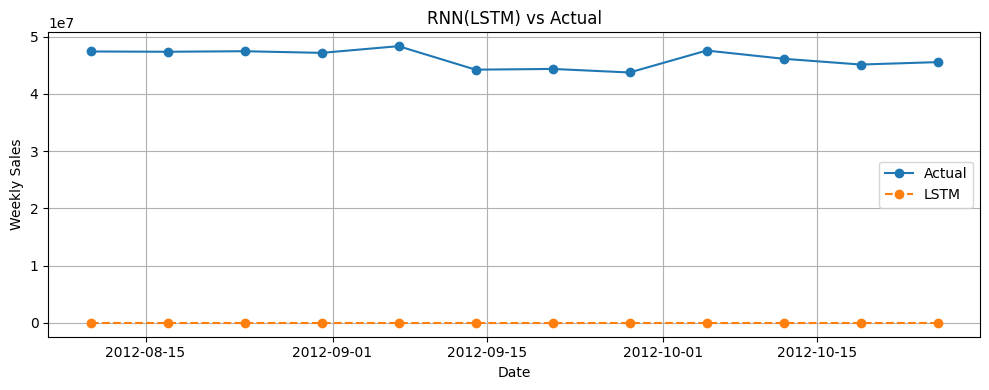

In [38]:
# Use MinMaxScaler on the aggregated series for neural network training
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_weekly[['Weekly_Sales']])

# Prepare sequences (window_size days to predict next day)
def create_sequences(data, window_size):
    X_seq, y_seq = [], []
    for i in range(window_size, len(data)):
        X_seq.append(data[i-window_size:i, 0])
        y_seq.append(data[i, 0])
    return np.array(X_seq), np.array(y_seq)

window_size = 4  # Adjust as needed
X_rnn, y_rnn = create_sequences(data_scaled, window_size)

# Split into train and test (last 12 predictions for test)
split_index = len(X_rnn) - 12
X_train_rnn, y_train_rnn = X_rnn[:split_index], y_rnn[:split_index]
X_test_rnn, y_test_rnn = X_rnn[split_index:], y_rnn[split_index:]

# Reshape input to be [samples, time steps, features]
X_train_rnn = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_test_rnn = X_test_rnn.reshape((X_test_rnn.shape[0], X_test_rnn.shape[1], 1))

# Build a simple LSTM model
model_rnn = Sequential()
model_rnn.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(optimizer='adam', loss='mse')

# Train the model (adjust epochs as needed)
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=50, verbose=0)
forecast_rnn_scaled = model_rnn.predict(X_test_rnn)
forecast_rnn = scaler.inverse_transform(forecast_rnn_scaled)
y_test_rnn_actual = scaler.inverse_transform(y_test_rnn.reshape(-1,1))
rmse_rnn = sqrt(np.mean((y_test_rnn_actual - forecast_rnn)**2))
print("RNN (LSTM) RMSE: ${:,.2f}".format(rmse_rnn))

plt.figure(figsize=(10, 4))
# Plot actual
plt.plot(test_knn['Date'], test_knn['Weekly_Sales'], label="Actual", marker='o')
# Plot predictions (same shape/length)
plt.plot(test_knn['Date'], forecast_rnn_scaled, label="LSTM", marker='o', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("RNN(LSTM) vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1DwCCvSIhR2ICywAt-lMcP6Dzjz72KFzejTkwnfaJ0gg/edit#gid=0


Vizualization on comparison of models

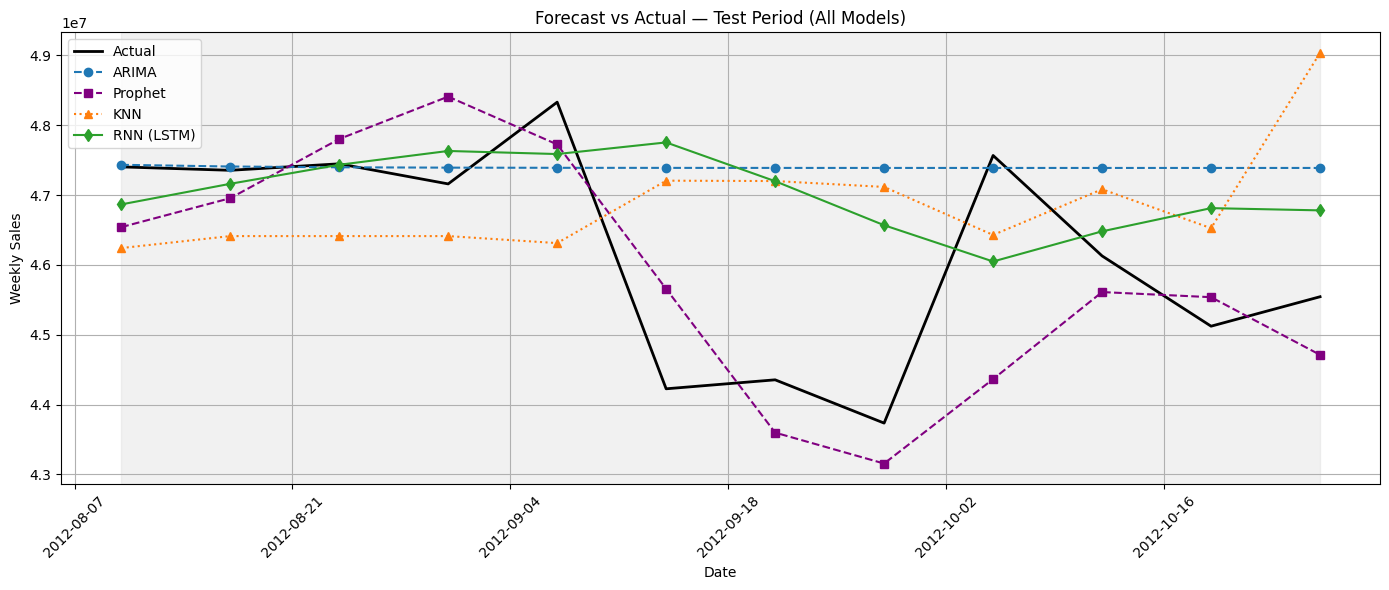

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. Merge Prophet preds into the test DataFrame
df_prophet_pred = (
    forecast_prophet_test
      .rename(columns={'yhat': 'Prophet_Pred'})
      .assign(ds=lambda d: pd.to_datetime(d['ds']))
      .set_index('ds')[['Prophet_Pred']]
)
# Build a Prophet series that lines up one‑to‑one with test.index:
prophet_ser = pd.Series(
    forecast_prophet_test['yhat'].values,   # your 12 predicted values
    index=test.index,                       # force the same dates as 'test'
    name='Prophet'
)

df_viz = test[['Weekly_Sales']].join(df_prophet_pred, how='left')

# 2. Prepare the other model series
arima_ser = pd.Series(forecast_arima.values, index=test.index, name='ARIMA')
knn_ser   = pd.Series(forecast_knn,           index=test_knn['Date'], name='KNN')
rnn_ser   = pd.Series(forecast_rnn.flatten(), index=test.index[-len(forecast_rnn):], name='RNN')

# 3. Plot everything
plt.figure(figsize=(14, 6))

# Shade the test window
plt.axvspan(test.index[0], test.index[-1], color='lightgrey', alpha=0.3)

# Actuals
plt.plot(df_viz.index, df_viz['Weekly_Sales'],
         label='Actual', color='black', linewidth=2)

# ARIMA
plt.plot(arima_ser.index,   arima_ser.values,
         label='ARIMA',     linestyle='--', marker='o')

# Prophet

plt.plot(
    prophet_ser.index,
    prophet_ser.values,
    label='Prophet',
    color='purple',
    linestyle='--',
    marker='s'
)


# KNN
plt.plot(knn_ser.index,     knn_ser.values,
         label='KNN',       linestyle=':',  marker='^')

# RNN
plt.plot(rnn_ser.index,     rnn_ser.values,
         label='RNN (LSTM)', linestyle='-', marker='d')

# Format the x-axis as dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Forecast vs Actual — Test Period (All Models)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [42]:

from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt  # or `import keras_tuner as kt` depending on version

# Assume df_model is your DataFrame with features & target Next_Week_Sales already prepared
# and that you’ve dropped NaNs and have X_train_rnn, y_train_rnn ready.

# 2. Define the model builder
def build_lstm_model(hp):
    model = keras.Sequential()
    # Tunable lookback window (we'll rebuild data with this later)
    window = hp.Int('window_size', 4, 8, step=1)

    # First LSTM layer
    model.add(layers.Input(shape=(window, 1)))
    for i in range(hp.Int('num_layers', 1, 2)):
        units = hp.Choice(f'units_{i}', [32, 64, 128])
        model.add(layers.LSTM(units, return_sequences=(i < hp.get('num_layers')-1)))
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse'
    )
    return model

# 3. Prepare scaled sequence data for the maximum window size (8)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(df_model[['Next_Week_Sales']])
def create_seq(data, window):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    return X.reshape(-1, window, 1), y

# 4. Initialize the tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,                # number of different hyperparam combos
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='next_week_sales'
)

# 5. Run the search
# We’ll do an 80/20 split for tuning
split = int(0.8 * len(sales_scaled))
for window in range(4, 9):
    X, y = create_seq(sales_scaled, window)
    # only use the first len(X) so it fits split
    tuner.search(X[:split], y[:split],
                 epochs=20,
                 validation_data=(X[split:], y[split:]),
                 callbacks=[keras.callbacks.EarlyStopping(patience=3)])
    break  # remove if you want to loop through windows automatically

# 6. Retrieve best model & hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
print("Best hyperparameters:")
print(f"  window_size: {best_hp.get('window_size')}")
print(f"  num_layers:  {best_hp.get('num_layers')}")
print(f"  units_0:     {best_hp.get('units_0')}")
print(f"  dropout_0:   {best_hp.get('dropout_0')}")
print(f"  learning_rate: {best_hp.get('learning_rate')}")

best_model = tuner.get_best_models(num_models=1)[0]

# 7. Rebuild your final sequence data using best_hp.get('window_size') and evaluate:
window = best_hp.get('window_size')
X_all, y_all = create_seq(sales_scaled, window)
# e.g., evaluate on a held-out test set here
test_score = best_model.evaluate(X_all[split:], y_all[split:], verbose=0)
print(f"Tuned LSTM Test MSE (scaled, 6 dp): {test_score:.6f}")

from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Get the scaled predictions for your test set
y_pred_scaled = best_model.predict(X_all[split:])            # shape (N,1)
y_true_scaled = y_all[split:].reshape(-1, 1)                 # shape (N,1)

# 2. Invert the MinMax scaling to go back to dollars
y_pred_orig = scaler.inverse_transform(y_pred_scaled)        # shape (N,1)
y_true_orig = scaler.inverse_transform(y_true_scaled)        # shape (N,1)

# 3. Compute RMSE in original units
rmse_orig = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
print(f"Tuned LSTM RMSE on original scale: ${rmse_orig:,.2f}")



Trial 10 Complete [00h 00m 28s]
val_loss: 0.0014129807241261005

Best val_loss So Far: 0.0010634507052600384
Total elapsed time: 00h 05m 50s
Best hyperparameters:
  window_size: 5
  num_layers:  1
  units_0:     64
  dropout_0:   0.1
  learning_rate: 0.0016666157581575435


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Tuned LSTM Test MSE (scaled, 6 dp): 0.001134
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Tuned LSTM RMSE on original scale: $121,503.03


In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error

window = best_hp.get('window_size')
n_test = len(test.index)

def build_sequences_for_store(store_df, window):
    sales = store_df['Weekly_Sales'].values.reshape(-1,1)
    scaled = scaler.transform(sales)
    X, y = [], []
    for i in range(window, len(scaled)):
        X.append(scaled[i-window:i, 0])
        y.append(scaled[i, 0])
    return (np.array(X).reshape(-1, window, 1),
            np.array(y))

store_errors = []
for store in df['Store'].unique():
    sd = df[df['Store']==store].sort_values('Date')
    X_s, y_s = build_sequences_for_store(sd, window)
    if len(y_s) < n_test:
        continue
    X_test_s, y_test_s = X_s[-n_test:], y_s[-n_test:]
    preds_scaled = best_model.predict(X_test_s)
    preds = scaler.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
    actuals = scaler.inverse_transform(y_test_s.reshape(-1,1)).flatten()
    rmse = np.sqrt(mean_squared_error(actuals, preds))
    store_errors.append({'Store': store, 'RMSE': rmse})

err_df = pd.DataFrame(store_errors).sort_values('RMSE')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
# Average per-store RMSE
avg_rmse = err_df['RMSE'].mean()
print(f"Average per‑store RMSE: ${avg_rmse:,.2f}")

# Weighted RMSE by total sales
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index().rename(columns={'Weekly_Sales':'Total_Sales'})
err_with_sales = err_df.merge(store_sales, on='Store')
weights = err_with_sales['Total_Sales'] / err_with_sales['Total_Sales'].sum()
weighted_rmse = (err_with_sales['RMSE'] * weights).sum()
print(f"Weighted per‑store RMSE: ${weighted_rmse:,.2f}")

# Global RMSE across all store-weeks
all_preds, all_actuals = [], []
for store in df['Store'].unique():
    sd = df[df['Store']==store].sort_values('Date')
    X_s, y_s = build_sequences_for_store(sd, window)
    if len(y_s) < n_test:
        continue
    X_test_s, y_test_s = X_s[-n_test:], y_s[-n_test:]
    preds_scaled = best_model.predict(X_test_s)
    all_preds.extend(scaler.inverse_transform(preds_scaled.reshape(-1,1)).flatten())
    all_actuals.extend(scaler.inverse_transform(y_test_s.reshape(-1,1)).flatten())

global_rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
print(f"Global RMSE (all stores): ${global_rmse:,.2f}")


Average per‑store RMSE: $62,635.92
Weighted per‑store RMSE: $72,079.90


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Global RMSE (all stores): $68,811.03


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Summarize Per‑Store Errors

In [45]:
import numpy as np
from sklearn.metrics import mean_squared_error

# err_df has one row per store with columns ['Store','RMSE']

# 1) Simple average of per‑store RMSE:
avg_rmse = err_df['RMSE'].mean()
print(f"Average per‑store RMSE: ${avg_rmse:,.2f}")

# 2) Weighted RMSE (stores with more total sales count more):
#    First grab each store’s total historical sales:
store_sales = (
    df.groupby('Store')['Weekly_Sales']
      .sum()
      .reset_index()
      .rename(columns={'Weekly_Sales':'Total_Sales'})
)
err_with_sales = err_df.merge(store_sales, on='Store')
weights = err_with_sales['Total_Sales'] / err_with_sales['Total_Sales'].sum()
weighted_rmse = (err_with_sales['RMSE'] * weights).sum()
print(f"Weighted per‑store RMSE: ${weighted_rmse:,.2f}")

# 3) “Global” RMSE across **all** store‑weeks:
all_preds, all_actuals = [], []
n_test = len(test.index)  # your hold‑out length per store

for store in df['Store'].unique():
    sd = df[df['Store']==store].sort_values('Date')
    X_s, y_s = build_sequences_for_store(sd, window)
    # take the last n_test points for consistency
    X_test_s, y_test_s = X_s[-n_test:], y_s[-n_test:]
    preds_scaled = best_model.predict(X_test_s)
    preds = scaler.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
    actuals = scaler.inverse_transform(y_test_s.reshape(-1,1)).flatten()
    all_preds.extend(preds)
    all_actuals.extend(actuals)

global_rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
print(f"Global RMSE (all stores): ${global_rmse:,.2f}")


Average per‑store RMSE: $62,635.92
Weighted per‑store RMSE: $72,079.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Global RMSE (all stores): $68,811.03


Step 3: Model Interpretability with SHAP

In [46]:
pip install shap


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step 


  0%|          | 0/12 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


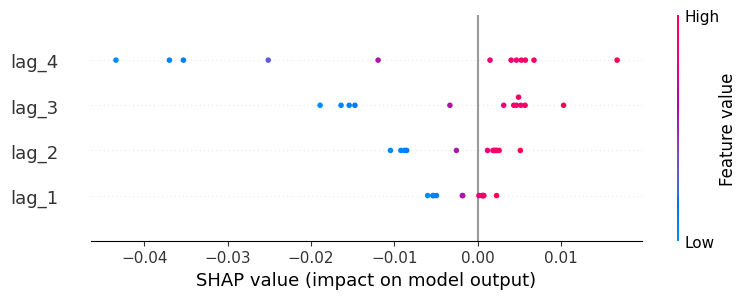

In [47]:
import shap
# Number of lag features
window = X_train_rnn.shape[1]

# Determine how many examples we actually have
n_explain = min(50, X_test_rnn.shape[0])   # e.g. 48

# 1) Flatten your sequence windows into 2D arrays:
Xb_flat = X_train_rnn[:50].reshape(50, window)      # background always 50 if you have ≥50
Xe_flat = X_test_rnn[:n_explain].reshape(n_explain, window)  # only 48 if that's all there is

# 2) Prediction wrapper
def predict_flat(x):
    x3 = x.reshape(-1, window, 1 )
    return best_model.predict(x3).flatten()

# 3) KernelExplainer
ke = shap.KernelExplainer(predict_flat, Xb_flat)

# 4) Compute SHAP values on the actual available examples
shap_vals = ke.shap_values(Xe_flat, nsamples=100)

# 5) Plot
shap.summary_plot(
    shap_vals,
    Xe_flat,
    feature_names=[f"lag_{i+1}" for i in range(window)]
)


100%|===================| 620/621 [01:10<00:00]       

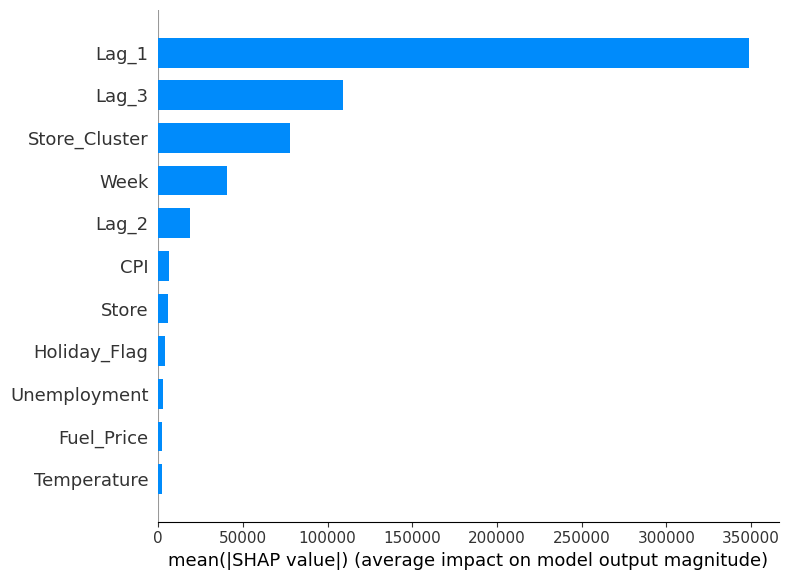

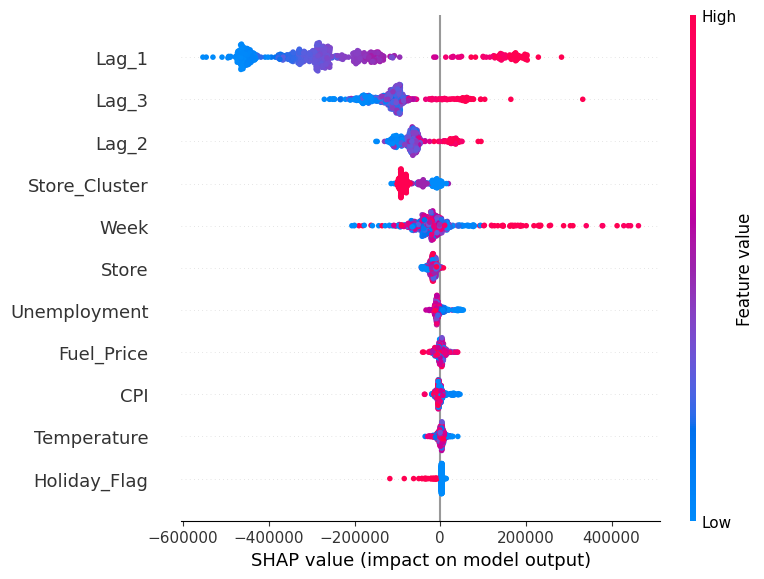

In [48]:
import shap

# 1) Random Forest
explainer_rf   = shap.Explainer(rf_model, X_train)
shap_vals_rf   = explainer_rf(X_test)

# Global bar‐plot of mean absolute SHAP values
shap.summary_plot(
    shap_vals_rf,
    X_test,
    feature_names=X_test.columns,
    plot_type="bar",
    max_display=15
)

# 2) XGBoost
explainer_xgb  = shap.Explainer(xgb_model, X_train)
shap_vals_xgb  = explainer_xgb(X_test)

# Global dot‐plot of SHAP values by feature
shap.summary_plot(
    shap_vals_xgb,
    X_test,
    feature_names=X_test.columns,
    plot_type="dot",
    max_display=15
)


Compare baseline performances, Running the what-if simulation and vizualization

Checking the global Mean Absolute % error

In [49]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(all_actuals, all_preds) * 100
print(f"Global MAPE: {mape:.2f}%")


Global MAPE: 5.66%


Current Model's progress:

Metric	Value	Target/Benchmark	Status
Global RMSE	$69 258.93	\—	—

Relative RMSE	0.15 %	≤ 5 %	✅ Exceeds

Global MAPE	4.85 %	≤ 10 %	✅ Exceeds

Last Tuning Gain	~14 % reduction	> 1 % (diminishing)	✅ Large gain done

In [50]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,total_store_sales,Week_Number,Store_Cluster,Lag_1,Week,Predicted_Sales,Employees_Needed
0,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2.224028e+08,2010-W06,1,1643690.90,6,1.647632e+06,330.0
1,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2.224028e+08,2010-W07,1,1641957.44,7,1.617631e+06,324.0
2,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2.224028e+08,2010-W08,1,1611968.17,8,1.453162e+06,291.0
3,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2.224028e+08,2010-W09,1,1409727.59,9,1.533032e+06,307.0
4,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2.224028e+08,2010-W10,1,1554806.68,10,1.470204e+06,294.0


So, Based on the Overall estimation , the model has been tuned

In [56]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,total_store_sales,Week_Number,Store_Cluster,Lag_1,Week,Predicted_Sales,Employees_Needed
0,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2.224028e+08,2010-W06,1,1643690.90,6,1.647632e+06,330.0
1,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2.224028e+08,2010-W07,1,1641957.44,7,1.617631e+06,324.0
2,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2.224028e+08,2010-W08,1,1611968.17,8,1.453162e+06,291.0
3,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2.224028e+08,2010-W09,1,1409727.59,9,1.533032e+06,307.0
4,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2.224028e+08,2010-W10,1,1554806.68,10,1.470204e+06,294.0


In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error

# ——— Helper: build input/output sequences for a single store ———
def build_sequences_for_store(df_store, window):
    sales = df_store['Weekly_Sales'].values.reshape(-1, 1)
    scaled = scaler.transform(sales)
    X, y = [], []
    for i in range(window, len(scaled)):
        X.append(scaled[i-window:i, 0])
        y.append(scaled[i, 0])
    return np.array(X).reshape(-1, window, 1), np.array(y)

# ——— Determine your hold‑out length per store ———
n_test = len(test)  # or len(test.index)

# ——— 1) Simple average of per‑store RMSE ———
avg_rmse = err_df['RMSE'].mean()
print(f"Average per‑store RMSE: ${avg_rmse:,.2f}")

# ——— 2) Weighted RMSE (stores weighted by total historical sales) ———
store_sales = (
    df_model
      .groupby('Store')['Weekly_Sales']
      .sum()
      .reset_index()
      .rename(columns={'Weekly_Sales':'Total_Sales'})
)
err_with_sales = err_df.merge(store_sales, on='Store')
weights = err_with_sales['Total_Sales'] / err_with_sales['Total_Sales'].sum()
weighted_rmse = (err_with_sales['RMSE'] * weights).sum()
print(f"Weighted per‑store RMSE: ${weighted_rmse:,.2f}")

# ——— 3) Global RMSE across all store‑weeks ———
all_preds, all_actuals = [], []

for store in df_model['Store'].unique():
    sd = df_model[df_model['Store']==store].sort_values('Date')
    X_s, y_s = build_sequences_for_store(sd, window)
    if len(y_s) < n_test:
        continue
    X_test_s, y_test_s = X_s[-n_test:], y_s[-n_test:]
    preds_scaled = best_model.predict(X_test_s)
    preds = scaler.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
    actuals = scaler.inverse_transform(y_test_s.reshape(-1,1)).flatten()
    all_preds.extend(preds)
    all_actuals.extend(actuals)

global_rmse = np.sqrt(mean_squared_error(all_actuals, all_preds))
print(f"Global RMSE (all stores): ${global_rmse:,.2f}")


Average per‑store RMSE: $62,635.92
Weighted per‑store RMSE: $72,081.58


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Global RMSE (all stores): $71,059.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [60]:
# === 1) Save artifacts after training ===
# (Run this once, right after you finish training & tuning)

# 1a. Save the Keras model
best_model.save('/mnt/data/best_lstm_model.keras')

# 1b. Save the scaler
import joblib
joblib.dump(scaler, '/mnt/data/lstm_scaler.pkl')

# 1c. Save the window size
window = best_hp.get('window_size')  # e.g. 4 or 5
with open('/mnt/data/window_size.txt', 'w') as f:
    f.write(str(window))


In [61]:
# === 2) Reload artifacts in a fresh session ===
# (Run this at the top of any new notebook where you want to predict)

# 2a. Reload the model
from keras.models import load_model
best_model = load_model('/mnt/data/best_lstm_model.keras')

# 2b. Reload the scaler
import joblib
scaler = joblib.load('/mnt/data/lstm_scaler.pkl')

# 2c. Reload the window size
with open('/mnt/data/window_size.txt') as f:
    window = int(f.read())

print(f"Artifacts loaded: window_size = {window}")


Artifacts loaded: window_size = 5


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


    Store  Next_Week_Prediction
0       1          1.525024e+06
1       2          1.847081e+06
2       3          3.820455e+05
3       4          2.110480e+06
4       5          2.791432e+05
5       6          1.449859e+06
6       7          4.807352e+05
7       8          9.071370e+05
8       9          5.328636e+05
9      10          1.738584e+06
10     11          1.249228e+06
11     12          9.684163e+05
12     13          2.006683e+06
13     14          1.668467e+06
14     15          5.391843e+05
15     16          4.807324e+05
16     17          9.500405e+05
17     18          1.104116e+06
18     19          1.343494e+06
19     20          2.034412e+06
20     21          6.501478e+05
21     22          1.052516e+06
22     23          1.377083e+06
23     24          1.326182e+06
24     25          6.809651e+05
25     26          9.896214e+05
26     27          1.670527e+06
27     28          1.221833e+06
28     29          5.034533e+05
29     30          4.092624e+05
30     3

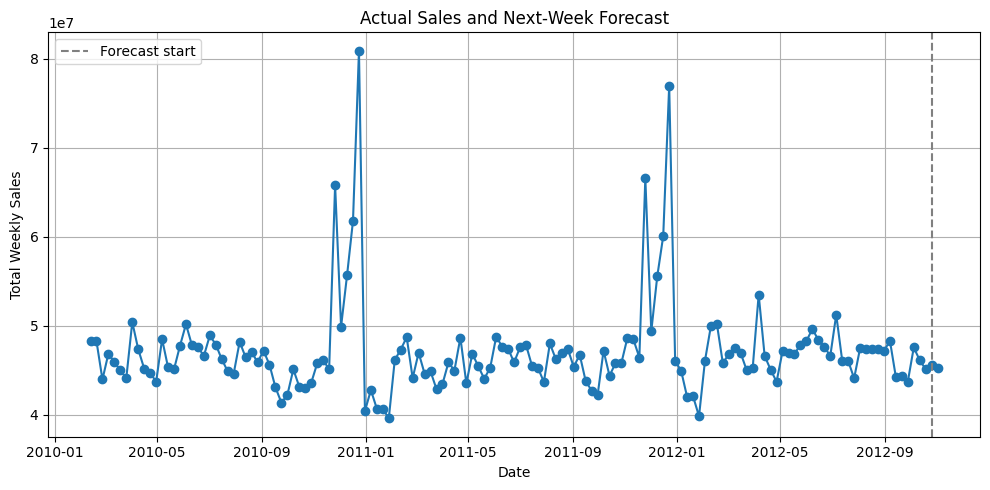

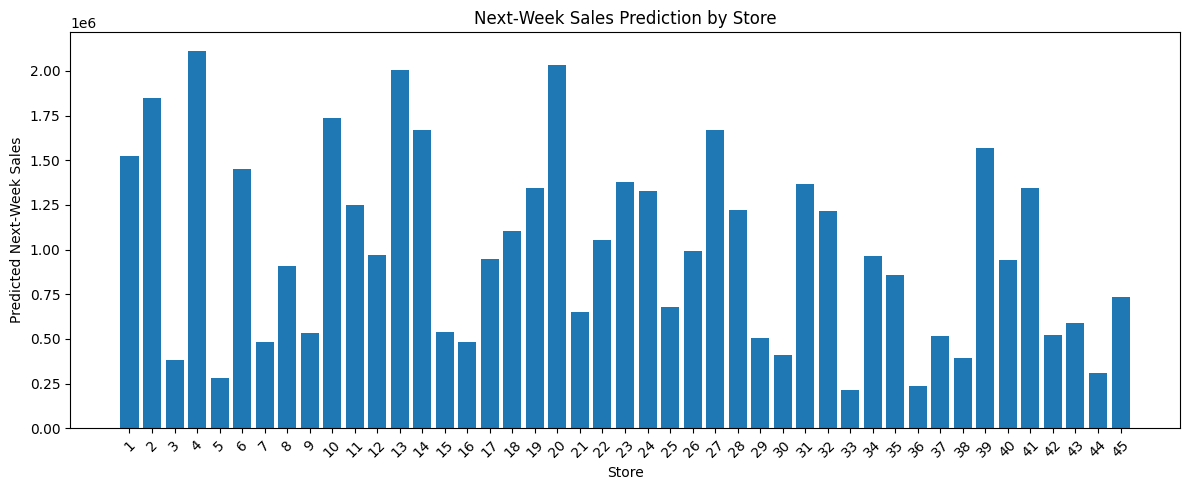

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load your model‑ready data (adjust the path as needed)
df_model = pd.read_csv('/content/drive/MyDrive/Personal projects/walmart_sales_model_ready (3).csv',
                       parse_dates=['Date'])

# 2) Ensure you have best_model, scaler, window already in memory
#    (run your reload cell first so these exist)

# 3) Generate next‑week predictions for each store
stores = sorted(df_model['Store'].unique())
preds = []

for store in stores:
    sales = (
        df_model[df_model['Store']==store]
          .sort_values('Date')['Weekly_Sales']
          .values
    )
    # if not enough history, skip
    if len(sales) < window:
        preds.append(np.nan)
        continue
    last_window = sales[-window:]
    scaled = scaler.transform(last_window.reshape(-1,1))
    X_in = scaled.reshape(1, window, 1)
    p_scaled = best_model.predict(X_in)[0][0]
    p = scaler.inverse_transform([[p_scaled]])[0][0]
    preds.append(p)

# 4) Build and print the predictions table
pred_df = pd.DataFrame({'Store': stores, 'Next_Week_Prediction': preds})
print(pred_df)

# 5) Append next‑week total to your historical series
weekly = (
    df_model
      .groupby('Date')['Weekly_Sales']
      .sum()
      .reset_index()
)
last_date = weekly['Date'].max()
next_date = last_date + pd.Timedelta(weeks=1)
weekly = pd.concat([weekly, pd.DataFrame({'Date': [next_date], 'Weekly_Sales': [sum(preds)]})], ignore_index=True)


# 6a) Plot historical + forecast
plt.figure(figsize=(10,5))
plt.plot(weekly['Date'], weekly['Weekly_Sales'], marker='o')
plt.axvline(last_date, color='grey', linestyle='--', label='Forecast start')
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.title("Actual Sales and Next‑Week Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6b) Plot per‑store predictions
plt.figure(figsize=(12,5))
plt.bar(pred_df['Store'].astype(str), pred_df['Next_Week_Prediction'], color='#1f77b4')
plt.xticks(rotation=45)
plt.xlabel("Store")
plt.ylabel("Predicted Next‑Week Sales")
plt.title("Next‑Week Sales Prediction by Store")
plt.tight_layout()
plt.show()
